<a href="https://colab.research.google.com/github/DipperGF/ianotebooks/blob/master/IANotebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import numpy as np

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from PIL import Image

In [19]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [5]:
iv3 = InceptionV3()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
96116736/96112376 [==============================] - 1s 0us/step


In [6]:
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:


# Cambia ./cat.jpg para cambiar la imagen
x = image.img_to_array(image.load_img("./cat.jpg", target_size=(299,299)))
#Cambio de rango, de 0-255 => -1-1
x /= 255
x -= 0.5
x *= 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)
decode_predictions(y)

[[('n02123045', 'tabby', 0.7778454),
  ('n02123159', 'tiger_cat', 0.14295655),
  ('n02124075', 'Egyptian_cat', 0.05036015),
  ('n04367480', 'swab', 0.0009136071),
  ('n03958227', 'plastic_bag', 0.00081734173)]]

## Ataques adversarios

In [21]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

loss = out_layer[0, target_class]

grad = K.gradients(loss, inp_layer)[0]

adv = np.copy(x)

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

pert = 0.01

max_pert = x + pert
min_pert = x - pert

cost = 0.0

while cost < 0.95:
    
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    
    print("Cost: ", cost)

Cost:  2.9990324e-05
Cost:  3.022246e-05
Cost:  3.0458255e-05
Cost:  3.0698433e-05
Cost:  3.0940064e-05
Cost:  3.11849e-05
Cost:  3.1435018e-05
Cost:  3.1686723e-05
Cost:  3.1940242e-05
Cost:  3.219576e-05
Cost:  3.245484e-05
Cost:  3.2718148e-05
Cost:  3.2986118e-05
Cost:  3.3259148e-05
Cost:  3.3539272e-05
Cost:  3.3824486e-05
Cost:  3.4109773e-05
Cost:  3.4400375e-05
Cost:  3.469336e-05
Cost:  3.4982393e-05
Cost:  3.527648e-05
Cost:  3.5571396e-05
Cost:  3.587074e-05
Cost:  3.617012e-05
Cost:  3.6471032e-05
Cost:  3.6774643e-05
Cost:  3.7082285e-05
Cost:  3.7394148e-05
Cost:  3.7708076e-05
Cost:  3.802473e-05
Cost:  3.8347207e-05
Cost:  3.867361e-05
Cost:  3.9006834e-05
Cost:  3.934065e-05
Cost:  3.967756e-05
Cost:  4.0016104e-05
Cost:  4.0358183e-05
Cost:  4.0704523e-05
Cost:  4.105588e-05
Cost:  4.141074e-05
Cost:  4.1768002e-05
Cost:  4.212462e-05
Cost:  4.248639e-05
Cost:  4.2855296e-05
Cost:  4.3232183e-05
Cost:  4.361418e-05
Cost:  4.400314e-05
Cost:  4.4398763e-05
Cost:  4.48

In [0]:
adv /= 2
adv += 0.5
adv *= 255


<function matplotlib.pyplot.show>

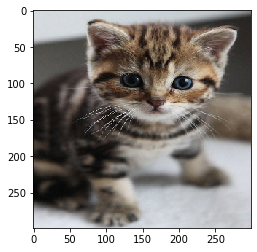

In [23]:
plt.imshow(adv[0].astype(np.uint8))
plt.show

In [24]:
im = Image.fromarray(adv[0].astype(np.uint8))
im.save('./hacked.png')
files.download('./hacked.png')

MessageError: ignored

In [25]:
# Cambia ./cat.jpg para cambiar la imagen
x2 = image.img_to_array(image.load_img("./hacked.png", target_size=(299,299)))
#Cambio de rango, de 0-255 => -1-1
x2 /= 255
x2 -= 0.5
x2 *= 2

x2 = x2.reshape([1, x2.shape[0], x2.shape[1], x2.shape[2]])

y2 = iv3.predict(x2)
decode_predictions(y2)

[[('n07749582', 'lemon', 0.99864453),
  ('n07742313', 'Granny_Smith', 0.00047295442),
  ('n03942813', 'ping-pong_ball', 0.00015696161),
  ('n07747607', 'orange', 0.00013841342),
  ('n03633091', 'ladle', 7.4071606e-05)]]